Татаренкова Алена ПИ18-3 Вариант 2 Данные с https://www.kaggle.com/uciml/glass

# Задание

Вариант 2. Описательный анализ и визуализация данных.
Данный вариант предполагает фокусировку на исследовании данных и визуализации. При решении этого варианта следует провести как можно более подробный описательный анализ данных с использованием максимального спектра средств визуализации. При этом следует делать значимые выводы об обнаруженных в данных закономерностях.

Импортирую нужные библиотеки

In [43]:
import pandas as pd
import time
import numpy as np

from sklearn.model_selection import train_test_split
import scipy.stats as stats

import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns

#Пытаюсь избавиться от лишних варнингов.
import warnings
warnings.filterwarnings("ignore")

Загружаю датасет и смотрю его shape

Glass Classification Нужно идентифицировать тип очков.

In [6]:
df = pd.read_csv('glass.csv')

print("The dataset has {} rows and {} columns.".format(*df.shape))

The dataset has 214 rows and 10 columns.


In [ ]:
RI: refractive index
Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
Mg: Magnesium
Al: Aluminum
Si: Silicon
K: Potassium
Ca: Calcium
Ba: Barium
Fe: Iron
Type of glass: (class attribute)
-- 1 buildingwindowsfloatprocessed 
-- 2 buildingwindowsnonfloatprocessed 
-- 3 vehiclewindowsfloatprocessed
-- 4 vehiclewindowsnonfloatprocessed (none in this database)
-- 5 containers
-- 6 tableware
-- 7 headlamps

Если бы передо мной стояла задача обучения с учителем, то в данном случае, требовалось бы выполнить задачу мультиклассовой классификации.

Предварительный просмотр нескольких строк данных датасета

In [7]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [8]:
#Описание численных данных датасета
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [9]:
#Подсчет пропущенных значений
df.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

Пропущенных значений нет, а если бы были, очистила бы при помощи df.dropna()

In [10]:
#Просмотр информации по датасету, о типах переменных в строках
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


Разбиваю датасет на тест и трейн подмножества

In [14]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Type', axis=1), df['Type'], test_size=0.3)
print(X_train, X_test, y_train, y_test)

          RI     Na    Mg    Al     Si     K     Ca   Ba    Fe
107  1.53393  12.30  0.00  1.00  70.16  0.12  16.19  0.0  0.24
19   1.51735  13.02  3.54  1.69  72.73  0.54   8.44  0.0  0.07
178  1.51829  14.46  2.24  1.62  72.38  0.00   9.26  0.0  0.00
137  1.51711  12.89  3.62  1.57  72.96  0.61   8.11  0.0  0.00
160  1.51832  13.33  3.34  1.54  72.14  0.56   8.99  0.0  0.00
..       ...    ...   ...   ...    ...   ...    ...  ...   ...
179  1.51852  14.09  2.19  1.66  72.67  0.00   9.32  0.0  0.00
29   1.51784  13.08  3.49  1.28  72.86  0.60   8.49  0.0  0.00
13   1.51748  12.86  3.56  1.27  73.21  0.54   8.38  0.0  0.17
156  1.51655  13.41  3.39  1.28  72.64  0.52   8.65  0.0  0.00
16   1.51784  12.68  3.67  1.16  73.11  0.61   8.70  0.0  0.00

[149 rows x 9 columns]           RI     Na    Mg    Al     Si     K     Ca    Ba    Fe
28   1.51768  12.56  3.52  1.43  73.15  0.57   8.54  0.00  0.00
34   1.51783  12.69  3.54  1.34  72.95  0.57   8.75  0.00  0.00
39   1.52213  14.21  3.82  0

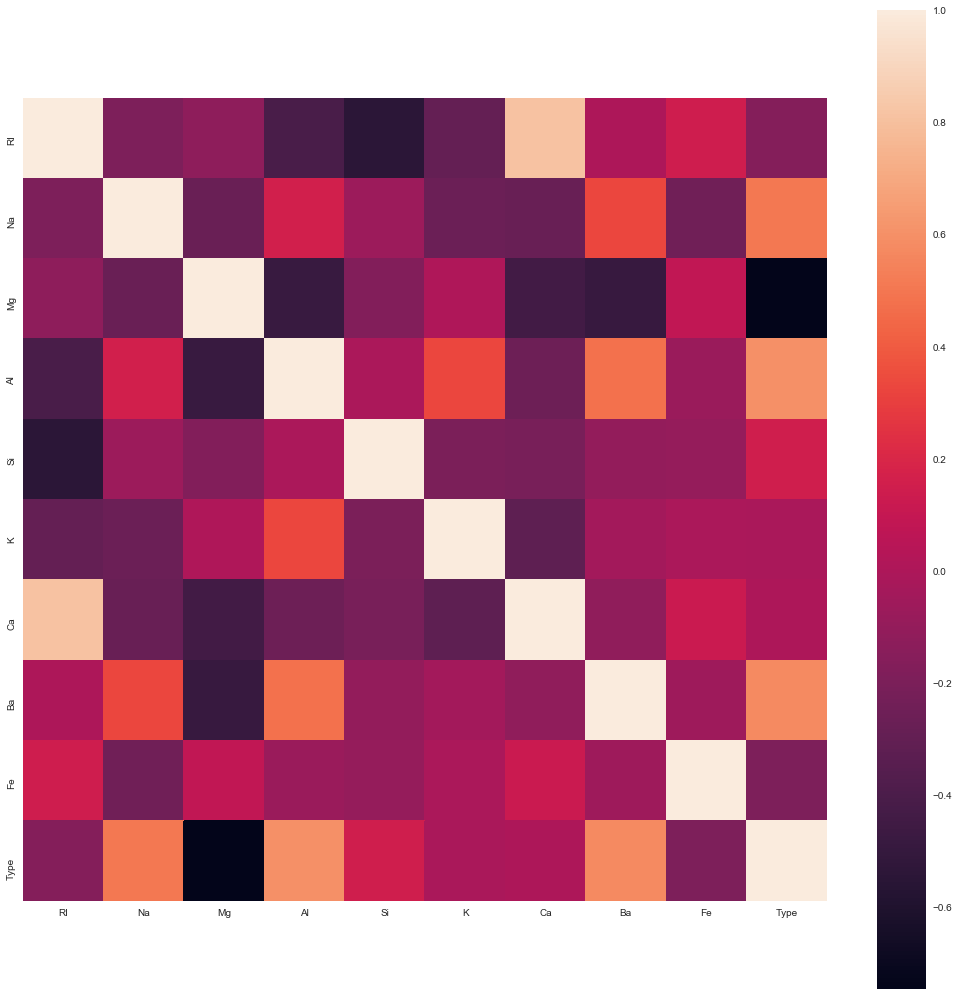

In [11]:
#Хитмап (красивая корреляционная матрица.)
corr = df.corr()
plt.figure(figsize=(18,18))
sns.heatmap(corr, square=True)
plt.show()

То же самое, что и хитмап выше, но с численными, более точными значениями.

In [44]:
df.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


refractive index сильно коррелирует с Calcium, остальные корреляции близки к 0.4 или ниже. С целевой переменной сильнее всего коррелирует Aluminum

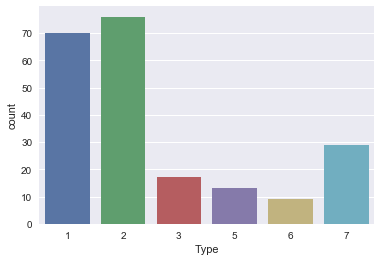

In [12]:
sns.countplot(x='Type', data=df)

Точные численные значения для графика выше.

In [27]:
df['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

Распределение типов типов очков в датасете неравномерное.

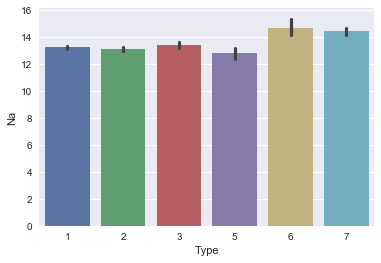

In [15]:
sns.barplot(x='Type', y='Na', data=df)

Строю графики распределений данных в датасете

IndexError: index 9 is out of bounds for axis 0 with size 9

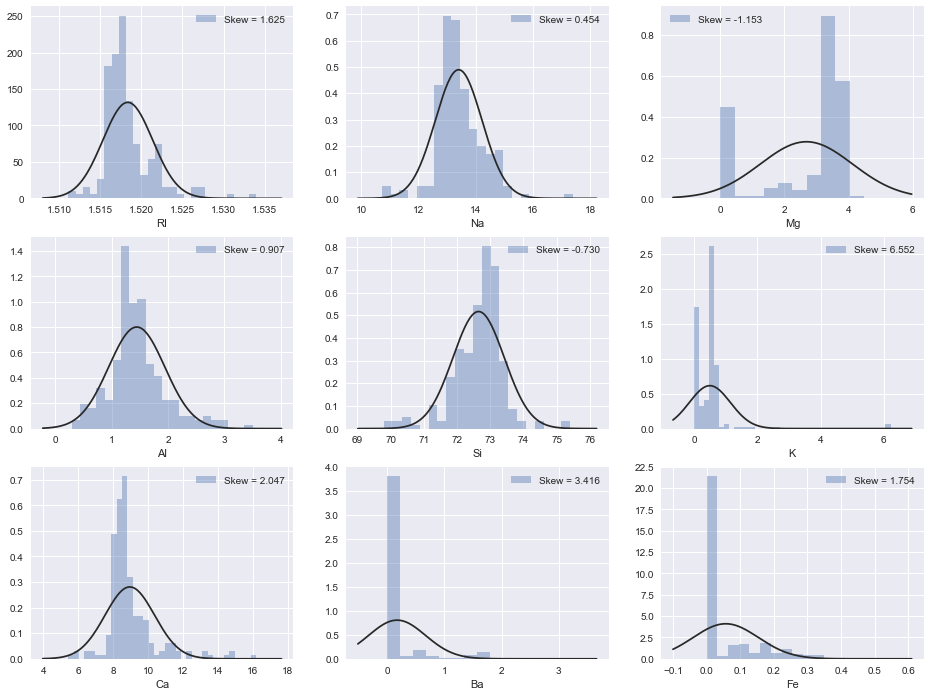

In [23]:
fig,ax = plt.subplots(3,3, figsize=(16, 12))
ax = ax.flatten()
i = 0
for col in df.columns:
    skew = df[col].skew()
    sns.distplot(df[col], ax = ax[i], fit= stats.norm, kde=False, label='Skew = %.3f' %(skew))
    ax[i].legend(loc='best')
    i += 1
plt.show()

Большинство столбцов данных имеют нормальное распределение, за исключением 3, 8 и 9 случаев на графиках.

Строю ящики с усами по всем стобцам данных

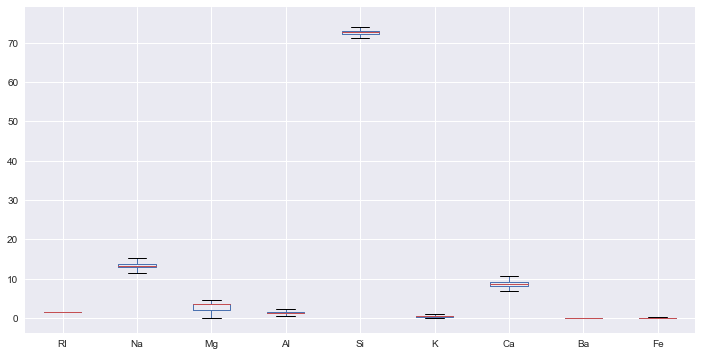

In [21]:
df.iloc[:,:-1].boxplot(figsize=(12,6))
plt.show()

Строю ящики с усами для просмотра распределения количества материала, из которого изготовлена оправа. Можно заметить, что силикона (Si) используется в разы больше, чем всего остального. В свою очередь Ba, Ri, Fe- относительно "редкие гости"- среднее содержание этих материалов в оправах очков мало.

IndexError: index 9 is out of bounds for axis 0 with size 9

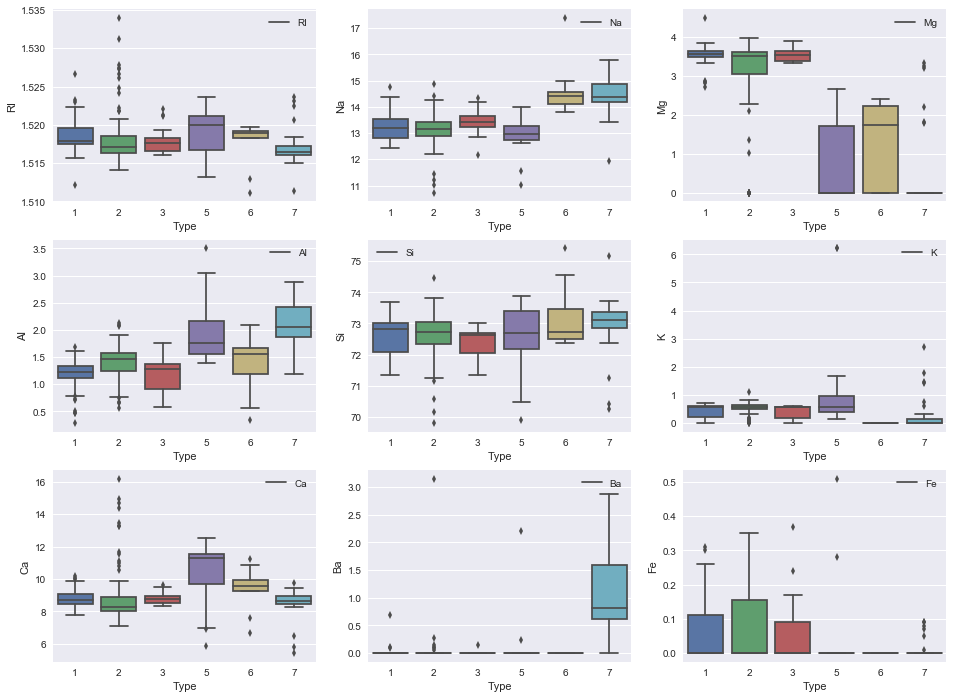

In [25]:
fig,ax = plt.subplots(3,3, figsize=(16, 12))
ax = ax.flatten()
i = 0
for col in df.columns:
    sns.boxplot("Type", col, ax = ax[i], data=df)
    ax[i].legend([col], loc='best')
    i += 1
plt.tight_layout()
plt.show()

Можно заметить интересную особенность - Barium используется практически только для очков 7 типа - headlamps

Железо же используется преимущественно для очков 1-3 типов-
-- 1 buildingwindowsfloatprocessed 
-- 2 buildingwindowsnonfloatprocessed 
-- 3 vehiclewindowsfloatprocessed

Ради интереса все таки обучу модель, чтобы считать работу законченной.

In [40]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

In [42]:
booster = xgb.XGBClassifier()
booster.fit(X_train, y_train)
predict = booster.predict(X_test)
print("Точность на трэйновой выборке: ", booster.score(X_train, y_train))
print("Точность на тестовой выборке: ", booster.score(X_test, y_test))
print("accuracy: ", accuracy_score(y_test, predict))

Точность на трэйновой выборке:  1.0
Точность на тестовой выборке:  0.7384615384615385
accuracy:  0.7384615384615385


Модель, очевидно, переобучена, так как не было задано никаких гиперпараметров, ограничивающих, например, глубину (количества вопросов, задаваемых к данным)

Но тем не менее, достаточно неплохой результат. Думаю, вполне можно улучшить, перебрав на GridSearchCV гиперпараметры и можно ожидать не менее 85% accuracy (правильно классифицированных объектов)

# итог

Я загрудила данные с Кэггла, просмотрела их распределение, степень коррелируемости столбцов друг с другом, провела детальный анализ датасета, обнаружила несколько интересных закономерностей, написала выводы, а так же, ради интереса, обучила модель классификации XGboost- ансамбль "забущенных" деревьев.